<a href="https://colab.research.google.com/github/elcesi/Predictivo_fuzzylogic/blob/master/Modelo_predictivo_duraciones_Fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo predictivo de duraciones basado en lógica borrosa** <b>
La lógica borrosa la podemos incluir dentro de la inteligencia computacional, concretamente dentro de la computación suave, término acuñado por el profesor Zadeh que a diferencia de la computación física que tiene como bases la precisión, la certeza y el rigor, esta computación es flexible requiriendo que el cálculo, el razonamiento y la toma de decisiones aprovechen la tolerancia a la imprecisión y la incertidumbre siempre que sea posible. Así mismo introdujo el concepto de conjunto borroso, que veremos más adelante, al darse cuenta de lo que el llamó el principio de incompatibilidad, es decir, conforme la complejidad de un sistema aumenta, la capacidad para ser preciso y construir instrucciones sobre su comportamiento disminuye hasta el umbral más allá del cual, la precisión y el significado son características excluyentes.
Los componentes principales de la computación flexible son la lógica difusa, que se ocupa principalmente de la imprecisión.
Esta se basa en la idea de que el conocimiento humano no funciona con números sino con etiquetas lingüísticas, facilitando el manejo de la imprecisión existente en muchos problemas y que no pueden ajustarse a un modelo matemático estanco y con ciertos requisitos. 
Claramente se puede observar esta posibilidad para mejorar en determinadas situaciones la resolución de problemas que no podrían ser abordados de otra manera.
Hay que destacar que uno de los objetivos de la lógica borrosa es proporcionar las bases del razonamiento aproximado que utiliza premisas imprecisas como instrumento para formular el conocimiento.
Para entender como funciona la lógica borrosa hay que hacer referencia previa a los conjuntos borrosos.
En la teoría de conjuntos clásicos un elemento pertenece o no a un determinado conjunto, es decir, los pacientes que tienen un dolor cualquiera pertenecen al conjunto de paciente con dolor. Esto puede parecer muy simplista y fácil de entender pero implica un concepto que aparece en la teoría de los conjuntos borrosos y no en la clásica, el grado de pertenencia.
El grado de pertenencia a un conjunto borroso debe ser asignado por un experto y debe estar dentro del intervalo [0,1].
En la teoría clásica de conjuntos todos los elementos pertenecen al conjunto pero no con un determinado grado, a diferencia de los conjuntos borrosos donde existen grados de pertenencia con relación al conjunto local. <b>
En función del dominio de conocimiento será un experto el que determine la función de pertenencia al conjunto borroso no confundiendo la misma con una distribución de probabilidad al uso.
Para representar el conocimiento se utilizan reglas. En las reglas se pueden incluir según sea la base de conocimiento operadores de negación, unión o intersección al igual que en la teoría de conjuntos clásicos.
En las reglas se definen una serie de variables que tiene asociado un dominio que está dividido a su vez en varios conjuntos borrosos, siendo el experto el que los determina.

En el algoritmo la variable V1 odebece a la variabilidad biológica de los pacientes siendo el médico quien lo determina basándose en la experiencia y conocimiento acumulado en su trayectoria profesional. En este caso una etiqueta grave implica que el proceso, según esa variabilidad biológica, va a tener tendencia a durar más que otros con similar estatus clínico

La variable V2 obedece a un conjunto de variables que explican parte la duración de cada patología, como son: diagnóstico, pago, cuenta, estado civil, hijos, codiagnóstico, ocupación, edad, provincia, fumador y sexo. Estas variables se agrupan para definir las etiquetas lingüisticas.La variable de salida V3 es la duración del proceso.

A la hora de definir las reglas de nuestro sistema experto se van a tener en cuenta las variables antes definidas. Desarrollar un sistema experto con un mecanismo de inferencia tipo Mamdani que incluya todos los diagnósticos sería desproporcionado ya que en la Cie-9Mc contamos con más de 20.000 epígrafes diagnósticos.
Es por ello que las reglas van a ser las mismas y sólo cambiará la variable de salida según el diagnóstico, es decir, una duración media de 50 días para una lumbalgia puede ser muy larga para un diagnóstico de resfriado común. 
En nuestro caso la variable de salida es para el diagnóstico de reacción de adaptación debido a la importancia que tiene por su duración, por la repercusión económica en gasto de incapacidad temporal y por el difícil manejo.

Vamos dividir el algoritmo en dos parte. La primera con el desarrollo del mismo y la representación del conocimiento y las reglas empleadas y la segunda con un ejemplo de un caso real.

# **Desarrollo del algoritmo**

In [1]:
!pip install -U scikit-fuzzy
import  numpy  as  np 
import skfuzzy  as  fuzz 
import  matplotlib.pyplot  as  plt

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.6/dist-packages (0.4.2)


In [0]:


from skfuzzy import control as ctrl

v1 = ctrl.Antecedent(np.arange(0, 11, 1), 'v1')
v2 = ctrl.Antecedent(np.arange(0, 11, 1), 'v2')
v3 = ctrl.Consequent(np.arange(0, 281, 1), 'v3')

v1['leve'] = fuzz.trimf(v1.universe, [0, 0, 6])
v1['media'] = fuzz.trimf(v1.universe, [4, 6, 8])
v1['grave'] = fuzz.trimf(v1.universe, [6, 8, 10])
v2['poco importante'] = fuzz.trimf(v2.universe, [0, 0, 6])
v2['importante'] = fuzz.trimf(v2.universe, [4, 6, 8])
v2['muy importante'] = fuzz.trimf(v2.universe, [6, 8, 10])

v3['muy corta'] = fuzz.trimf(v3.universe, [0, 0, 10])
v3['corta'] = fuzz.trimf(v3.universe, [10, 30, 50])
v3['media'] = fuzz.trimf(v3.universe, [30, 50, 120])
v3['larga'] = fuzz.trimf(v3.universe, [50, 120, 280])
v3['muy larga'] = fuzz.trimf(v3.universe, [120, 280, 280])


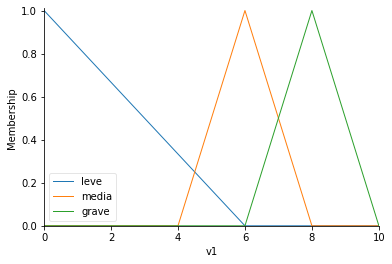

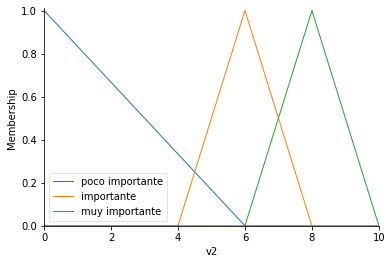

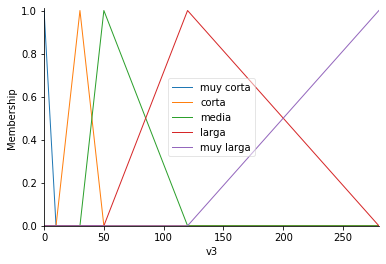

In [3]:
v1.view()
v2.view()
v3.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb338af52b0>)

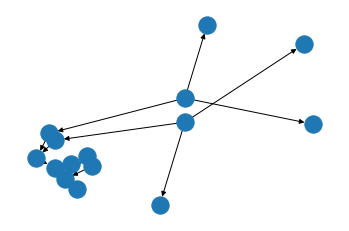

In [5]:
rule1 = ctrl.Rule(v1['leve'] & v2['poco importante'], v3['muy corta'])
rule2 = ctrl.Rule(v1['leve'] & v2['importante'], v3['corta'])
rule3 = ctrl.Rule(v1['leve'] & v2['muy importante'], v3['media'])
rule4 = ctrl.Rule(v1['media'] & v2['poco importante'], v3['corta'])
rule5 = ctrl.Rule(v1['media'] & v2['importante'], v3['media'])
rule6 = ctrl.Rule(v1['media'] & v2['muy importante'], v3['larga'])
rule7 = ctrl.Rule(v1['grave'] & v2['poco importante'], v3['media'])
rule8 = ctrl.Rule(v1['grave'] & v2['importante'], v3['larga'])
rule9 = ctrl.Rule(v1['grave'] & v2['muy importante'], v3['muy larga'])


rule1.view()

# **Ejemplo con caso real** <b>

A continuación utilizamos la base conocimiento previamente definida para obtener una salida que será la duración estimada por el sistema experto según la base de hechos que ejecutemos. 
Esta base de hechos va a ser definida por el médico gestor del proceso en base a las necesidades clínico gestoras del momento e incorporada al sistema de apoyo en la toma de decisiones de la HCI.
En nuestro caso la base de hechos que se va a ejecutar es que V1 es 7.5, es decir, etiqueta media-grave y V2 es 6, es decir, repercusión importante sobre el proceso.

Obtenemos una duración de 145.5 días siendo la duración real del proceso de 140.01 días.


145.4496026603801


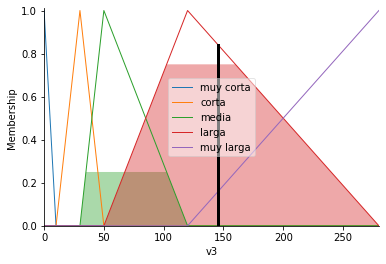

In [6]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4, rule5, rule6,rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['v1'] = 7.5
tipping.input['v2'] = 6

tipping.compute()
print (tipping.output['v3'])
v3.view(sim=tipping)